In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.model_selection import KFold, train_test_split, cross_validate, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.dummy import DummyRegressor

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

%matplotlib inline

In [2]:
df = pd.read_csv('df_log.csv')

In [3]:
df.head()

,currency,launched_at,staff_pick,is_starrable,spotlight,percent_funded,duration,log_per_fund,log_goal,log_backers,log_fb,log_created,log_backed
0,EUR,1586717639,False,True,False,112.1,20.000000,4.719391,8.006368,3.871201,5.993961,1.098612,0.000000
1,USD,1586604501,False,True,False,234.6,13.398368,5.457882,8.006368,6.735780,0.000000,3.332205,6.799056
2,GBP,1586599529,False,True,False,167.0,6.787859,5.117994,4.605170,2.890372,5.545177,3.135494,1.386294
3,USD,1586541615,False,True,False,246.6,30.000000,5.507768,6.214608,4.158883,0.000000,0.000000,0.000000
4,GBP,1586520314,False,True,False,375.4,30.995671,5.927992,6.214608,3.784190,0.000000,2.833213,2.564949


In [4]:
df = df.drop(['launched_at', 'percent_funded', 'log_backers', 'currency'], axis=1)

In [5]:
df.head()

,staff_pick,is_starrable,spotlight,duration,log_per_fund,log_goal,log_fb,log_created,log_backed
0,False,True,False,20.000000,4.719391,8.006368,5.993961,1.098612,0.000000
1,False,True,False,13.398368,5.457882,8.006368,0.000000,3.332205,6.799056
2,False,True,False,6.787859,5.117994,4.605170,5.545177,3.135494,1.386294
3,False,True,False,30.000000,5.507768,6.214608,0.000000,0.000000,0.000000
4,False,True,False,30.995671,5.927992,6.214608,0.000000,2.833213,2.564949


In [6]:
df.shape

(900, 9)

In [10]:
df.corr()

,staff_pick,is_starrable,spotlight,duration,log_per_fund,log_goal,log_fb,log_created,log_backed
staff_pick,1.000000,-0.021776,0.025146,-0.077694,0.106285,0.151660,0.063548,-0.009074,0.131656
is_starrable,-0.021776,1.000000,-0.932522,0.314521,-0.045277,0.076801,-0.009917,0.058896,-0.083065
spotlight,0.025146,-0.932522,1.000000,-0.325173,0.028826,-0.081196,0.038139,-0.050107,0.109510
duration,-0.077694,0.314521,-0.325173,1.000000,-0.010831,0.263366,-0.023388,-0.081749,-0.214443
log_per_fund,0.106285,-0.045277,0.028826,-0.010831,1.000000,-0.168896,0.037576,0.097803,0.034042
log_goal,0.151660,0.076801,-0.081196,0.263366,-0.168896,1.000000,0.035812,0.126650,0.115049
log_fb,0.063548,-0.009917,0.038139,-0.023388,0.037576,0.035812,1.000000,0.211274,0.296909
log_created,-0.009074,0.058896,-0.050107,-0.081749,0.097803,0.126650,0.211274,1.000000,0.278434
log_backed,0.131656,-0.083065,0.109510,-0.214443,0.034042,0.115049,0.296909,0.278434,1.000000


In [13]:
df_heat = df.drop(['is_starrable'], axis=1)

In [14]:
df_heat.columns

Index(['staff_pick', 'spotlight', 'duration', 'log_per_fund', 'log_goal',
       'log_fb', 'log_created', 'log_backed'],
      dtype='object')

In [15]:
df_heat.columns = ['Staff Pick', 'Spotlight', 'Duration', 'Percent Funded', \
       'Goal', 'Facebook', 'Created', 'Backed']

In [16]:
df_heat.head()

,Staff Pick,Spotlight,Duration,Percent Funded,Goal,Facebook,Created,Backed
0,False,False,20.000000,4.719391,8.006368,5.993961,1.098612,0.000000
1,False,False,13.398368,5.457882,8.006368,0.000000,3.332205,6.799056
2,False,False,6.787859,5.117994,4.605170,5.545177,3.135494,1.386294
3,False,False,30.000000,5.507768,6.214608,0.000000,0.000000,0.000000
4,False,False,30.995671,5.927992,6.214608,0.000000,2.833213,2.564949


In [17]:
df_heat = df_heat[['Staff Pick', 'Spotlight', 'Duration',  \
       'Goal', 'Facebook', 'Created', 'Backed', 'Percent Funded']]

Text(0.5, 1.0, 'Correlation Heatmap')

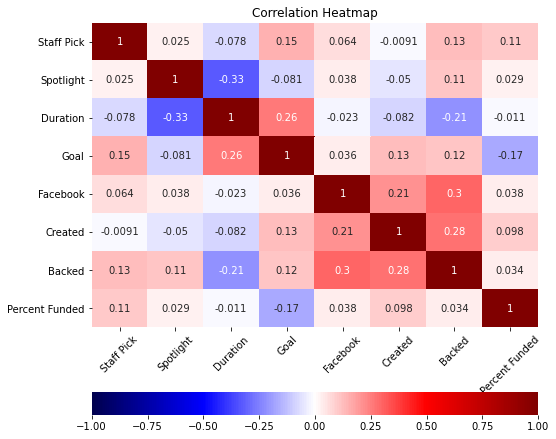

In [18]:
plt.subplots(figsize=(8,8))
df_heatmap = sns.heatmap(df_heat.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, cbar_kws= {'orientation': 'horizontal'}, )
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)
plt.title('Correlation Heatmap')

The above heatmap is still part of the EDA. I probably should've moved it to the exploration notebook. In any case, the last row in the heatmap shows the low correlation between the target "Percent Funded" and the features. Note that I created this figure for my presentation, so many of the features and the target itself are actually transformed.

In [19]:
X = df[['log_goal', 'staff_pick', 'log_created']]
y = df['log_per_fund']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()

lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.06693172684063886

Above is just a simple regression I ran to get an idea of the R^2. Not so good.

Below is a scatterplot of the residuals. Definitely better than what I got prior to transforming the data. But still maybe not ideal.

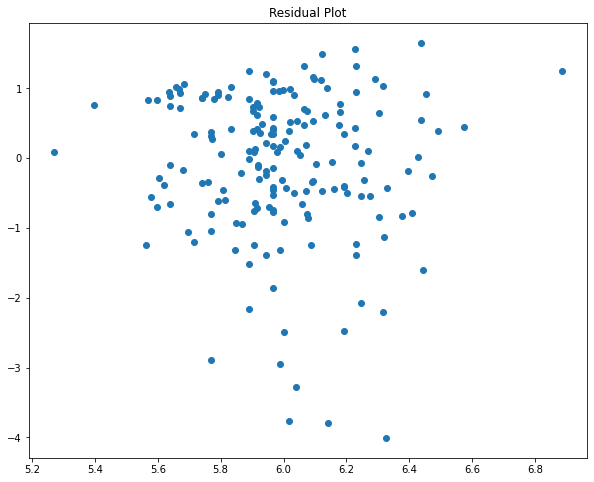

In [20]:
plt.subplots(figsize=(10,8))
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test)
plt.title('Residual Plot')
plt.savefig('lr_scatter.png')

In [26]:
X = df.drop(['log_per_fund'], axis=1)
y = df['log_per_fund']

#### Train/Validation Split

In [27]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    
    Input: 
        X: Dataframe of features
        y: Dataframe (series) of target

    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2)
    
    
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    
    # Predict on the test data: y_pred
    y_pred = lr_model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print("Root Mean Squared Error: {}".format(rmse))
    
    print('\nFeature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')
        


In [28]:
split_and_validate(X,y)


Validation R^2 score was: 0.04406095932159393
Root Mean Squared Error: 0.9092503441608393

Feature coefficient results: 

staff_pick : 0.56
is_starrable : -0.44
spotlight : -0.32
duration : 0.01
log_goal : -0.14
log_fb : -0.00
log_created : 0.13
log_backed : 0.01


The above was still another test run this time using train_test_split

Below was a test using statsmodel.

In [29]:
y_stats, X_stats = patsy.dmatrices('log_per_fund ~ spotlight + staff_pick + log_goal + log_created + log_fb + duration + log_backed', data = df, return_type="dataframe")
model = sm.OLS(y_stats, X_stats)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_per_fund   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     9.320
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           3.56e-11
Time:                        23:19:44   Log-Likelihood:                -1258.2
No. Observations:                 900   AIC:                             2532.
Df Residuals:                     892   BIC:                             2571.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5048      0.197     33.085      0.000       6.119       6.891
spotlight[T.True]      0.1180      0.102      1.157      0.248      -0.082       0.318
staff_pick[T.True]     0.4900      0.112      4.387      0.000       0.271       0.709
log_goal              -0.1354      0.020     -6.609      0.000      -0.176      -0.095
log_created            0.1208      0.032      3.815      0.000       0.059       0.183
log_fb                 0.0013      0.011      0.114      0.909      -0.020       0.023
duration               0.0094      0.004      2.420      0.016       0.002       0.017
log_backed             0.0112      0.022      0.504      0.615      -0.032       0.055
==============================================================================
Omnibus:                      109.936   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.589
Skew:                           0.892   Prob(JB):                     1.64e-34
Kurtosis:                       3.984   Cond. No.                         162.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

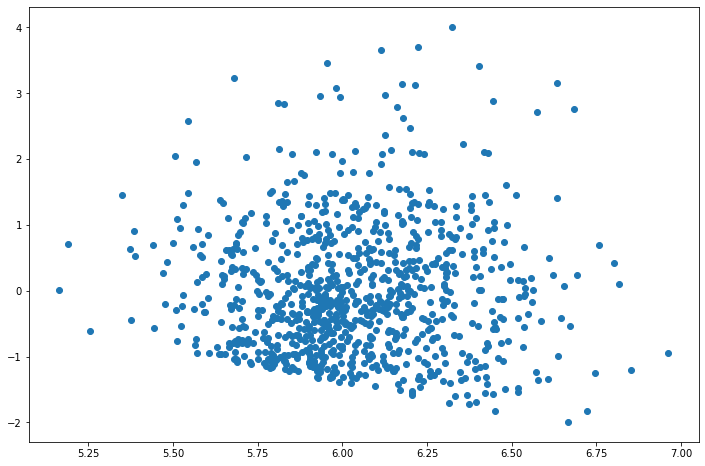

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(fit.predict(), fit.resid)

So I'm not sure about the residual plot above. It definitely looks off. I'm not totally sure I did it correctly. I used code I googled.

#### Comparing Regression Methods

In [17]:
X = df.drop(['log_per_fund'], axis=1)
y = df['log_per_fund']

In [18]:
# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [20]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [21]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.038
Ridge Regression val R^2: 0.038
Degree 2 polynomial regression val R^2: -0.740


In [22]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: -0.058


So I'm not sure if I did something wrong, but it seems odd to me that the OLS and Ridge regression appear to be returning the same R^2. Also, perhaps my model is overfitting based on the negative R^2 for the test. However, my R^2 is so low to begin with that maybe this is just by chance. 

#### KFold

In [72]:
X = df.drop(['log_per_fund'], axis=1)
y = df['log_per_fund']

In [73]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [88]:
kf = KFold(n_splits=5, shuffle=True)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    lm = LinearRegression()

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    
    lm_reg = Ridge(alpha=1)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.010309724814159704, 0.024218949986126725, -0.05884677483973544, 0.10544602230265443, 0.11377856522235208]
Ridge scores:  [0.010584227289649695, 0.02447105934731475, -0.058546876553219336, 0.10518171456003167, 0.11353282716987345] 

Simple mean cv r^2: 0.039 +- 0.064
Ridge mean cv r^2: 0.039 +- 0.064


Seems like Simple and Ridge yield essentially the same results. 

In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X,y)
print(f'Simple Regression test R^2: {lm.score(X_test, y_test):.3f}')

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Simple Regression test R^2: 0.020
Ridge Regression test R^2: 0.020


In the results above, both OLS and Ridge are still giving the same results. At least this time the R^2 are not negative (but that may be simply due to chance).

In [23]:
X = df.drop(['log_per_fund'], axis=1)
y = df['log_per_fund']

In [24]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [25]:
#run the CV

kf = KFold(n_splits=5, shuffle=True)
cv_lm_r2s, cv_lm_reg_r2s, cv_poly = [], [], [] #collect the validation results for both models
cv_lm_rmse, cv_lm_reg_rmse, cv_lm_poly_rmse = [], [], [] 

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    lm_te_pred = lm.predict(X_val)
    cv_lm_rmse.append(np.sqrt(mean_squared_error(y_val, lm_te_pred)))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    lm_reg_te_pred = lm_reg.predict(X_val_scaled)
    cv_lm_reg_rmse.append(np.sqrt(mean_squared_error(y_val, lm_reg_te_pred)))
    
    #Feature transforms for train, val, and test so that we can run our poly model on each
    poly = PolynomialFeatures(degree=2) 

    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)

    lm_poly = LinearRegression()
    lm_poly.fit(X_train_poly, y_train)
    cv_poly.append(lm_poly.score(X_val_poly, y_val))
    
    lm_poly_te_pred = lm_poly.predict(X_val_poly)
    cv_lm_poly_rmse.append(np.sqrt(mean_squared_error(y_val, lm_poly_te_pred)))


print('Simple regression scores: ', cv_lm_r2s, '\n')
print('Ridge scores: ', cv_lm_reg_r2s, '\n')
print('Degree 2 polynomial: ', cv_poly, '\n\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')
print(f'Degree 2 polynomial mean cv R^2: {np.mean(cv_poly):.3f} +- {np.std(cv_poly):.3f}')

print(f'Simple mean cv rmse: {np.mean(cv_lm_rmse):.3f} +- {np.std(cv_lm_rmse):.3f}')
print(f'Ridge mean cv rmse: {np.mean(cv_lm_reg_rmse):.3f} +- {np.std(cv_lm_reg_rmse):.3f}')
print(f'Degree 2 polynomial mean cv rmse: {np.mean(cv_lm_poly_rmse):.3f} +- {np.std(cv_lm_poly_rmse):.3f}')


Simple regression scores:  [0.010478628925134736, 0.031100505337447234, 0.019190401102942456, -0.03236210512308468, 0.1313659115079292] 

Ridge scores:  [0.01035670568713909, 0.031112426515690243, 0.01938555487611371, -0.031247574521672483, 0.13132574436750233] 

Degree 2 polynomial:  [-0.4723379261883364, -13.241297718035007, 0.0566812006851951, -0.07022711780717406, -15.013585547185393] 


Simple mean cv r^2: 0.032 +- 0.054
Ridge mean cv r^2: 0.032 +- 0.054
Degree 2 polynomial mean cv R^2: -5.748 +- 6.867
Simple mean cv rmse: 0.973 +- 0.076
Ridge mean cv rmse: 0.972 +- 0.076
Degree 2 polynomial mean cv rmse: 2.185 +- 1.393


Polynomial regression did not seem to be useful here. 

#### Lasso

In [107]:
X = df.drop(['log_per_fund'], axis=1)
y = df['log_per_fund']

In [109]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [120]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 



In [121]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.values, y_train)
    
    val_set_pred = pipe.predict(X_val.values)
    err_vec_val[i] = mae(y_val, val_set_pred)

0.04481660986126055
lambda: 0.01


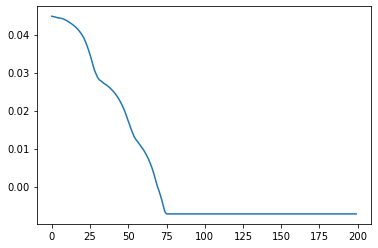

In [122]:
print(test_r2.max())
print(f'lambda: {alphalist[test_r2.argmax()]}')
plt.plot(test_r2)

In [123]:
model = Lasso(alpha = alphalist[test_r2.argmax()])
model.fit(X,y)
list(zip(X.columns,model.coef_))

[('staff_pick', 0.3694778836154407),
 ('is_starrable', -0.07806394664428265),
 ('spotlight', 0.0),
 ('duration', 0.007938378819509612),
 ('log_goal', -0.12644292092352383),
 ('log_fb', 0.002089085082508055),
 ('log_created', 0.1087332302116851),
 ('log_backed', 0.010651251454155124)]

#### LassoCV

In [371]:
X = df.drop(['log_per_fund'], axis=1)
y = df['log_per_fund']

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2) 

In [373]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [374]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [375]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [376]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

0.01

In [377]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('staff_pick', 0.16582569915319598),
 ('is_starrable', -0.04228751160254512),
 ('spotlight', -0.0),
 ('duration', 0.0906977337594604),
 ('log_goal', -0.19069281377496278),
 ('log_fb', 0.008838396372956693),
 ('log_created', 0.09360667530079582),
 ('log_backed', 0.0)]

In [378]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [379]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

0.7831647497109753

In [380]:
lasso_CV_rmse = np.sqrt(mean_squared_error(y_test, test_set_pred))
lasso_CV_rmse

0.9866378260003624

In [381]:
lasso_CV_r2 = r2_score(y_test, test_set_pred)
lasso_CV_r2

0.06774954561810365

Sooo.... I'm not actually sure how to evaulate LassoCV compared to simple OLS and Ridge since LassoCV does cross validation on its own. I need to look into this further. 
I also completely forgot about the LARS figure that one could generate. I'd like to see how that compares with what I got from removing features using the p-value from statsmodels below.

As my ridge and OLS regressions seemed to be similar, I decided to use simple OLS and statsmodel with p-values to remove features one by one when using all 7 features.

In [165]:
X = df.drop(['log_per_fund'], axis=1)
y = df['log_per_fund']

In [166]:
y_stats, X_stats = patsy.dmatrices('log_per_fund ~ spotlight + staff_pick + log_goal + log_created + log_fb + duration + log_backed', data = df, return_type="dataframe")
model = sm.OLS(y_stats, X_stats)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_per_fund   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     9.320
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           3.56e-11
Time:                        01:17:20   Log-Likelihood:                -1258.2
No. Observations:                 900   AIC:                             2532.
Df Residuals:                     892   BIC:                             2571.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5048      0.197     33.085      0.000       6.119       6.891
spotlight[T.True]      0.1180      0.102      1.157      0.248      -0.082       0.318
staff_pick[T.True]     0.4900      0.112      4.387      0.000       0.271       0.709
log_goal              -0.1354      0.020     -6.609      0.000      -0.176      -0.095
log_created            0.1208      0.032      3.815      0.000       0.059       0.183
log_fb                 0.0013      0.011      0.114      0.909      -0.020       0.023
duration               0.0094      0.004      2.420      0.016       0.002       0.017
log_backed             0.0112      0.022      0.504      0.615      -0.032       0.055
==============================================================================
Omnibus:                      109.936   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.589
Skew:                           0.892   Prob(JB):                     1.64e-34
Kurtosis:                       3.984   Cond. No.                         162.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
y_stats, X_stats = patsy.dmatrices('log_per_fund ~ spotlight + staff_pick + log_goal + log_created + duration + log_backed', data = df, return_type="dataframe")
model = sm.OLS(y_stats, X_stats)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_per_fund   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     10.88
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           1.02e-11
Time:                        01:17:57   Log-Likelihood:                -1258.2
No. Observations:                 900   AIC:                             2530.
Df Residuals:                     893   BIC:                             2564.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5051      0.196     33.109      0.000       6.120       6.891
spotlight[T.True]      0.1184      0.102      1.163      0.245      -0.081       0.318
staff_pick[T.True]     0.4905      0.112      4.398      0.000       0.272       0.709
log_goal              -0.1355      0.020     -6.621      0.000      -0.176      -0.095
log_created            0.1213      0.031      3.877      0.000       0.060       0.183
duration               0.0095      0.004      2.434      0.015       0.002       0.017
log_backed             0.0118      0.021      0.550      0.582      -0.030       0.054
==============================================================================
Omnibus:                      109.985   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.682
Skew:                           0.892   Prob(JB):                     1.56e-34
Kurtosis:                       3.985   Cond. No.                         161.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
y_stats, X_stats = patsy.dmatrices('log_per_fund ~ spotlight + staff_pick + log_goal + log_created + duration', data = df, return_type="dataframe")
model = sm.OLS(y_stats, X_stats)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_per_fund   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     13.01
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           3.06e-12
Time:                        01:19:02   Log-Likelihood:                -1258.4
No. Observations:                 900   AIC:                             2529.
Df Residuals:                     894   BIC:                             2558.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5272      0.192     33.950      0.000       6.150       6.905
spotlight[T.True]      0.1221      0.102      1.202      0.230      -0.077       0.321
staff_pick[T.True]     0.4969      0.111      4.481      0.000       0.279       0.714
log_goal              -0.1341      0.020     -6.607      0.000      -0.174      -0.094
log_created            0.1258      0.030      4.160      0.000       0.066       0.185
duration               0.0091      0.004      2.374      0.018       0.002       0.017
==============================================================================
Omnibus:                      109.489   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.901
Skew:                           0.889   Prob(JB):                     2.31e-34
Kurtosis:                       3.986   Cond. No.                         158.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
y_stats, X_stats = patsy.dmatrices('log_per_fund ~ staff_pick + log_goal + log_created + duration', data = df, return_type="dataframe")
model = sm.OLS(y_stats, X_stats)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_per_fund   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     15.89
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           1.42e-12
Time:                        01:19:46   Log-Likelihood:                -1259.1
No. Observations:                 900   AIC:                             2528.
Df Residuals:                     895   BIC:                             2552.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.6661      0.154     43.374      0.000       6.364       6.968
staff_pick[T.True]     0.4962      0.111      4.474      0.000       0.279       0.714
log_goal              -0.1336      0.020     -6.585      0.000      -0.173      -0.094
log_created            0.1227      0.030      4.073      0.000       0.064       0.182
duration               0.0076      0.004      2.098      0.036       0.000       0.015
==============================================================================
Omnibus:                      109.819   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.248
Skew:                           0.892   Prob(JB):                     1.94e-34
Kurtosis:                       3.980   Cond. No.                         120.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2_Adj dropped slightly when removing 'spotlight' since it had a relatively high p-value. It's probably worth the slight drop since the model was simplified. 